In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**Load actual data (wind direction and wind speed) from station (dir -1 means variable direcction)**

In [1]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/Harmonie_vs_WRF/LEPPY20211201Y20230315.csv",
                          usecols = ["time","dir_o","spd_o"],
                          parse_dates=["time"]).set_index("time")
station.describe()

,dir_o,spd_o
count,22788.000000,22788.000000
mean,183.342329,2.983608
std,136.833992,2.602951
min,-1.000000,0.000000
25%,0.000000,1.028888
50%,180.000000,2.057776
75%,320.000000,4.629996
max,360.000000,17.491096


**Climatology labeled and relationship variable wind (VRB) and wind intensity**

In [4]:
#wind direction to interval dir=-1 variable wind
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])

labels = ['VRB', '[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]',
          '(100, 120]', '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]',
          '(200, 220]','(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]',
          '(300, 320]', '(320, 340]', '(340, 360]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')


#observed climatology
print("wind direction climatology\n")
print(station["dir_l"].value_counts(normalize= True).transform(lambda x: '{:,.0%}'.format(x)))

station["spd_o_kt"]=np.rint(station["spd_o"]*1.94384)
print("\nwind intensity percentage (kt) when wind variable\n")
print(station[station.dir_l=="VRB"]["spd_o_kt"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x)))
print("\nwind direction when wind speed equal or less than 3 kt\n")
station[station.spd_o_kt<=3]["dir_l"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x))


wind direction climatology

(300, 320]    16%
[0, 20]       16%
(320, 340]    14%
VRB           11%
(340, 360]     6%
(140, 160]     6%
(160, 180]     5%
(280, 300]     5%
(120, 140]     4%
(180, 200]     3%
(100, 120]     3%
(260, 280]     2%
(80, 100]      2%
(60, 80]       2%
(200, 220]     2%
(240, 260]     1%
(40, 60]       1%
(220, 240]     1%
(20, 40]       1%
Name: dir_l, dtype: object

wind intensity percentage (kt) when wind variable

2.0    55%
1.0    42%
3.0     2%
4.0     1%
6.0     0%
7.0     0%
5.0     0%
8.0     0%
Name: spd_o_kt, dtype: object

wind direction when wind speed equal or less than 3 kt



[0, 20]       34%
VRB           26%
(280, 300]     5%
(160, 180]     4%
(300, 320]     4%
(140, 160]     4%
(260, 280]     3%
(320, 340]     3%
(60, 80]       2%
(120, 140]     2%
(40, 60]       2%
(80, 100]      2%
(340, 360]     2%
(240, 260]     2%
(180, 200]     2%
(100, 120]     1%
(20, 40]       1%
(220, 240]     1%
(200, 220]     1%
Name: dir_l, dtype: object

**Forecast D0**

In [6]:
#forecast d0
model1k = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/LEPP/Harmonie_vs_WRF/lpp_h.xlsx",parse_dates=["time"]).set_index("time")
model1k

,dir0,snow_prec0,isocero0,mod0,racha_u0,racha_v0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00,6.70,0,1748.98,0.65,-0.07,-0.86,96843.00,275.42,0.91,9961.89,...,-18027.54,5802.0,0.65,0.00,0.0,0.65,55832.66,15091.41,254.48,276.39
2021-12-01 01:00:00,309.52,0,1863.92,0.65,0.68,-0.52,96750.50,275.26,0.91,10342.69,...,-18224.88,5800.0,0.42,0.00,0.0,0.42,55754.09,15013.80,254.32,276.41
2021-12-01 02:00:00,177.09,0,1971.57,0.18,-0.03,0.30,96660.34,275.17,0.90,10627.18,...,-18260.63,5800.0,0.13,0.01,0.0,0.13,55648.93,14939.99,254.30,276.38
2021-12-01 03:00:00,134.49,0,2043.07,0.26,-0.29,0.27,96581.60,275.10,0.90,10826.18,...,-18138.61,5798.0,0.01,0.18,0.0,0.18,55561.82,14880.32,254.31,276.61
2021-12-01 04:00:00,219.52,0,1977.76,0.12,0.15,0.20,96510.55,275.07,0.90,11224.13,...,-18171.24,6096.0,0.14,0.03,0.0,0.17,55478.26,14815.40,254.30,276.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15 19:00:00,195.01,0,2262.41,1.82,0.52,2.29,96065.20,284.65,0.72,23099.84,...,-11743.16,9157.0,0.02,0.00,0.0,0.02,56117.12,14709.41,257.48,284.47
2023-03-15 20:00:00,198.36,0,2294.07,1.57,0.58,1.98,96067.14,283.15,0.77,19987.88,...,-13019.14,8112.0,0.01,0.00,0.0,0.01,56144.04,14712.13,257.61,284.55
2023-03-15 21:00:00,175.57,0,2328.54,0.81,-0.13,1.09,96069.27,282.06,0.82,16854.59,...,-13923.57,7226.0,0.13,0.00,0.0,0.13,56153.93,14710.62,257.47,284.30


**Delete rows with wind direction variable obseved**

In [7]:
#concat station vs meteorological  model. Delete variable (VRB) observed direction
df_vrb = pd.concat([station,model1k],axis=1).drop(columns=["spd_o","spd_o_kt"]).dropna()
df_all1k = df_vrb[df_vrb.dir_o!=-1]
df_all1k

,dir_o,dir_l,dir0,snow_prec0,isocero0,mod0,racha_u0,racha_v0,mslp0,temp0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00,0.0,"[0, 20]",6.70,0.0,1748.98,0.65,-0.07,-0.86,96843.00,275.42,...,-18027.54,5802.0,0.65,0.00,0.0,0.65,55832.66,15091.41,254.48,276.39
2021-12-01 01:00:00,0.0,"[0, 20]",309.52,0.0,1863.92,0.65,0.68,-0.52,96750.50,275.26,...,-18224.88,5800.0,0.42,0.00,0.0,0.42,55754.09,15013.80,254.32,276.41
2021-12-01 02:00:00,0.0,"[0, 20]",177.09,0.0,1971.57,0.18,-0.03,0.30,96660.34,275.17,...,-18260.63,5800.0,0.13,0.01,0.0,0.13,55648.93,14939.99,254.30,276.38
2021-12-01 03:00:00,0.0,"[0, 20]",134.49,0.0,2043.07,0.26,-0.29,0.27,96581.60,275.10,...,-18138.61,5798.0,0.01,0.18,0.0,0.18,55561.82,14880.32,254.31,276.61
2021-12-01 04:00:00,0.0,"[0, 20]",219.52,0.0,1977.76,0.12,0.15,0.20,96510.55,275.07,...,-18171.24,6096.0,0.14,0.03,0.0,0.17,55478.26,14815.40,254.30,276.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 19:00:00,20.0,"[0, 20]",353.75,0.0,1530.09,3.81,0.84,-5.68,96546.76,280.97,...,-13459.23,8516.0,1.00,0.00,0.0,1.00,55450.81,14869.96,256.77,276.22
2023-03-14 20:00:00,30.0,"(20, 40]",353.31,0.0,1664.69,2.41,0.58,-3.72,96576.39,280.32,...,-14078.05,8508.0,1.00,0.00,0.0,1.00,55520.37,14875.10,256.94,276.71
2023-03-14 21:00:00,50.0,"(40, 60]",342.29,0.0,1723.74,3.03,1.64,-4.55,96591.75,279.94,...,-14427.15,8020.0,0.99,0.00,0.0,0.99,55587.73,14891.30,256.83,276.77


**Label meteorological points 0 and 1**

In [8]:
#label meteorological model variables dir0 and dir1
df_all1k["dir0_l"] = pd.cut(df_all1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
df_all1k["dir1_l"] = pd.cut(df_all1k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')

df_all1k[["dir_l","dir0_l","dir1_l"]].sample(20)

<ipython-input-8-d2a85177323f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-d2a85177323f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dir_l,dir0_l,dir1_l
time,,,
2022-01-16 22:00:00,"(300, 320]","(280, 300]","(280, 300]"
2022-09-07 20:00:00,"(160, 180]","(300, 320]","(320, 340]"
2022-07-03 08:00:00,"(320, 340]","(320, 340]","(340, 360]"
2022-10-04 00:00:00,"(60, 80]","(280, 300]","(280, 300]"
2022-12-24 13:00:00,"(180, 200]","(180, 200]","(180, 200]"
2022-09-22 05:00:00,"[0, 20]","(260, 280]","(260, 280]"
2022-08-13 19:00:00,"(180, 200]","(60, 80]","(60, 80]"
2022-03-31 06:00:00,"(320, 340]","(280, 300]","(280, 300]"
2022-02-03 04:00:00,"(120, 140]","(100, 120]","(60, 80]"


**meteorological model score point 0**

****

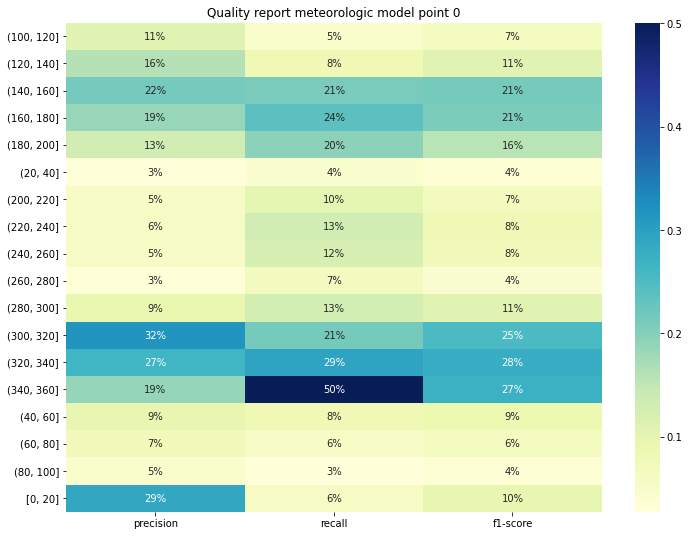

In [9]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

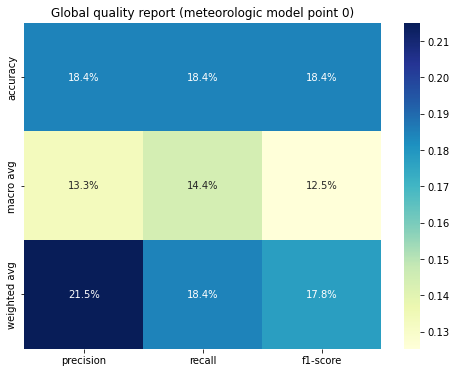

In [10]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

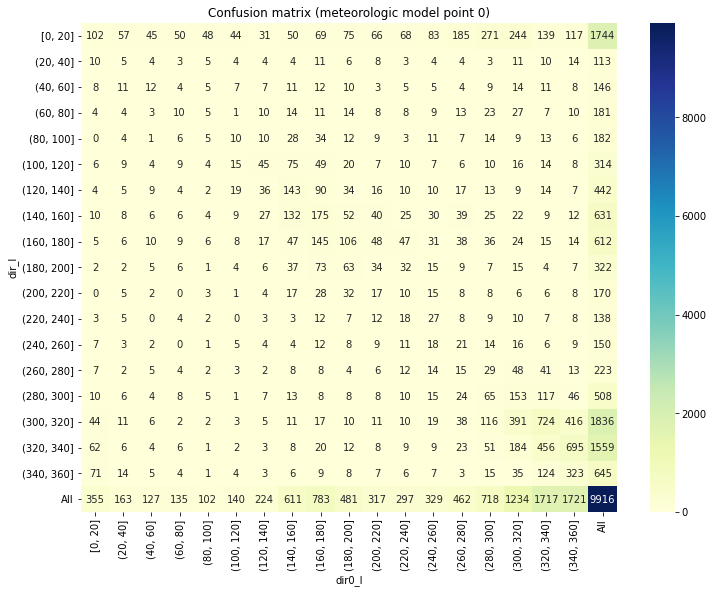

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

<ipython-input-12-2860f24ac3c5>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



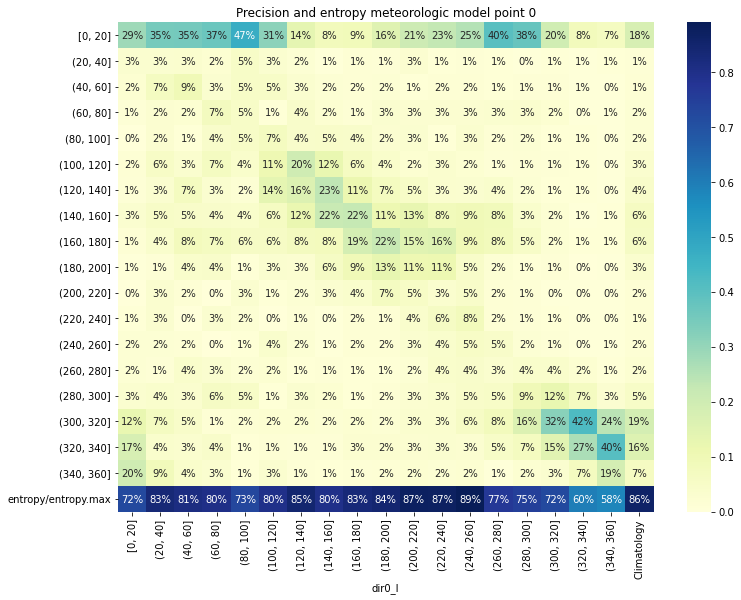

In [12]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**meteorological model score point 1**

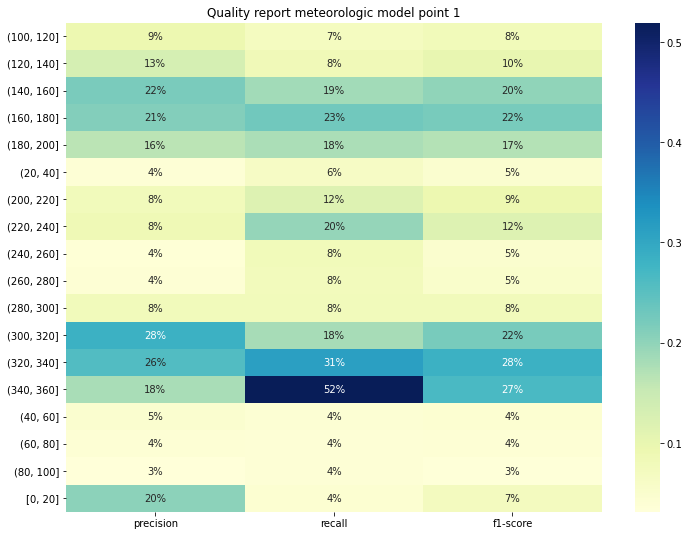

In [13]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 1")
cr=pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir1_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

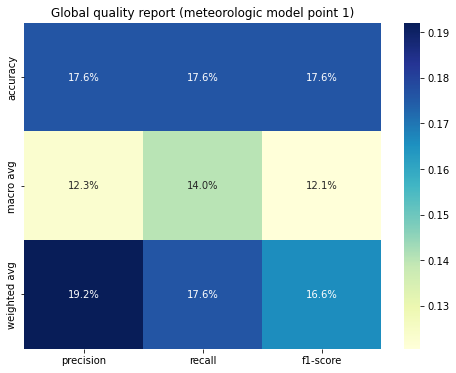

In [14]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 1)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

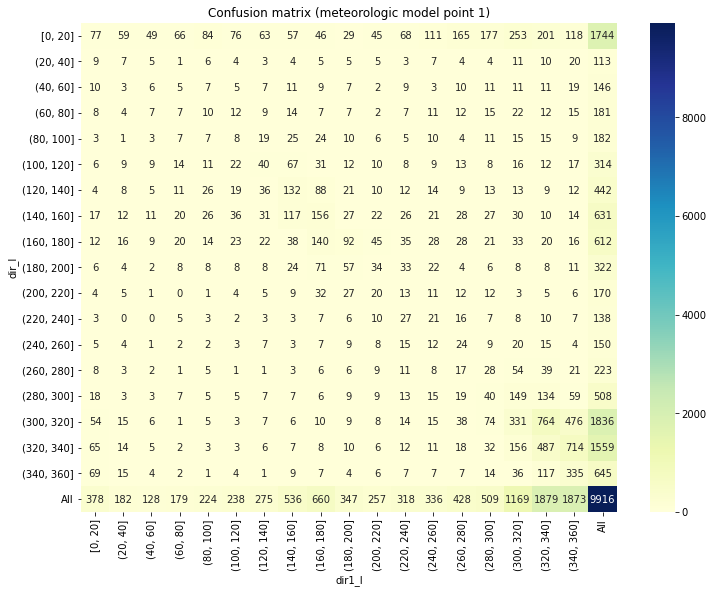

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 1)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

<ipython-input-16-7c12b6563b43>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



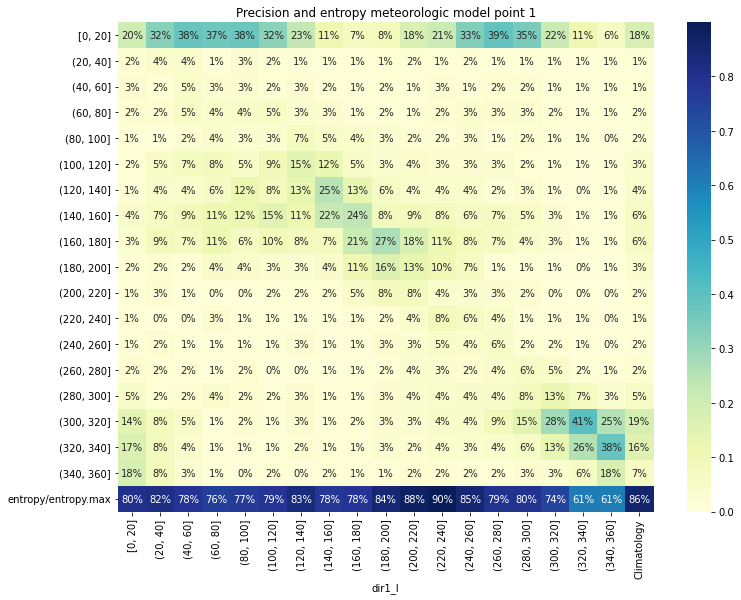

In [16]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 1")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**T test accuracy (2 samples) at point 0 and point 1. Best point 1. Significance level (alpha) = 0.01.
Test two sides and one side**

In [17]:
from sklearn.metrics import accuracy_score
import scipy.stats as stats

#Accuracy in 10 samples
concat = df_all1k[["dir_l","dir0_l","dir1_l"]]
acc_met0 = []
acc_met1 = []

for t in range (0,10):
  #sample lenght as y_test machine learning
  concat_t = concat.sample(2472)
  acc_met0.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir0_l"]),2))
  acc_met1.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir1_l"]),2))

print(pd.DataFrame(acc_met0,columns=["Accuracy point 0"]).describe()) 
print("\nAccuracy list point 0:") 
acc0 = np.around(acc_met0, decimals=2)
print(acc0)
print("****************")
print(pd.DataFrame(acc_met1,columns=["Accuracy point 1"]).describe()) 
print("\nAccuracy list point 1:") 
acc1 = np.around(acc_met1, decimals=2)
print(acc1)

#two samples t test two sides
alpha = 0.01
_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False)

print("\nt test two samples two sides")
print("\np_value:",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis  accuracy mean point0 not equal accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")

#two samples t test one side
#alternative hypothesis the mean of the distribution underlying the first sample is less than 
#the mean of the distribution underlying the second sample.

_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False,alternative="less")

print("\nt test two samples one side")
print("\np_value:",p_value)
alpha = 0.01
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean point0 is less than accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")



       Accuracy point 0
count         10.000000
mean           0.182000
std            0.004216
min            0.180000
25%            0.180000
50%            0.180000
75%            0.180000
max            0.190000

Accuracy list point 0:
[0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.19 0.19 0.18]
****************
       Accuracy point 1
count         10.000000
mean           0.176000
std            0.005164
min            0.170000
25%            0.170000
50%            0.180000
75%            0.180000
max            0.180000

Accuracy list point 1:
[0.17 0.18 0.17 0.18 0.18 0.18 0.17 0.18 0.17 0.18]

t test two samples two sides

p_value: 0.011023940170333191

we are accepting null hypothesis  H0 accuracy mean point0= accuracy mean point 1

t test two samples one side

p_value: 0.9944880299148334

we are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point 


**Test association between observed variable and meteorological model (point 0) (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [18]:
#two way table
pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l)

dir0_l,"[0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]","(180, 200]","(200, 220]","(220, 240]","(240, 260]","(260, 280]","(280, 300]","(300, 320]","(320, 340]","(340, 360]"
dir_l,,,,,,,,,,,,,,,,,,
"[0, 20]",102,57,45,50,48,44,31,50,69,75,66,68,83,185,271,244,139,117
"(20, 40]",10,5,4,3,5,4,4,4,11,6,8,3,4,4,3,11,10,14
"(40, 60]",8,11,12,4,5,7,7,11,12,10,3,5,5,4,9,14,11,8
"(60, 80]",4,4,3,10,5,1,10,14,11,14,8,8,9,13,23,27,7,10
"(80, 100]",0,4,1,6,5,10,10,28,34,12,9,3,11,7,14,9,13,6
"(100, 120]",6,9,4,9,4,15,45,75,49,20,7,10,7,6,10,16,14,8
"(120, 140]",4,5,9,4,2,19,36,143,90,34,16,10,10,17,13,9,14,7
"(140, 160]",10,8,6,6,4,9,27,132,175,52,40,25,30,39,25,22,9,12
"(160, 180]",5,6,10,9,6,8,17,47,145,106,48,47,31,38,36,24,15,14


**All cells must be more than five!!!. No Chi square test posible**

In [19]:
from scipy.stats import chi2_contingency

alpha = 0.01

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l))

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables

print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between meteorological model variables and observed values")
else:
    print("Retain H0,There is no association between meteorological model variables and observed values")

p-value: 0.0
Significance level: 0.01
Degres of of freedom:  289
Stadistic 8602.2001602985
Reject H0,There is an association between meteorological model variables and observed values


In [20]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0', 'racha_v0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0', 'lhsublac0',
       'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1', 'lwflx1',
       'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501'],
      dtype='object')

**Machine learning**

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [04:00<00:00,  8.30s/it]


In [ ]:
models

**Compare Machine learning accuracy vs meteorological model accuracy point 0 and 1.**

<ipython-input-21-3f1750f25a86>:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.346154  0.183673  0.240000    49.000000
(120, 140]     0.260000  0.200000  0.226087    65.000000
(140, 160]     0.280488  0.244681  0.261364    94.000000
(160, 180]     0.236559  0.250000  0.243094    88.000000
(180, 200]     0.444444  0.210526  0.285714    38.000000
(20, 40]       0.000000  0.000000  0.000000    20.000000
(200, 220]     0.444444  0.173913  0.250000    23.000000
(220, 240]     0.000000  0.000000  0.000000    16.000000
(240, 260]     0.333333  0.030303  0.055556    33.000000
(260, 280]     0.090909  0.028571  0.043478    35.000000
(280, 300]     0.419355  0.152941  0.224138    85.000000
(300, 320]     0.440771  0.583942  0.502355   274.000000
(320, 340]     0.405622  0.435345  0.419958   232.000000
(340, 360]     0.378788  0.240385  0.294118   104.000000
(40, 60]       0.000000  0.000000  0.000000    25.000000
(60, 80]       0.000000  0.000000  0.000000    19.000000
(80, 100]      0.125000  0.0357

<ipython-input-21-3f1750f25a86>:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.241379  0.140000  0.177215    50.000000
(120, 140]     0.236364  0.216667  0.226087    60.000000
(140, 160]     0.333333  0.316327  0.324607    98.000000
(160, 180]     0.234568  0.218391  0.226190    87.000000
(180, 200]     0.321429  0.160714  0.214286    56.000000
(20, 40]       0.000000  0.000000  0.000000    13.000000
(200, 220]     0.125000  0.090909  0.105263    22.000000
(220, 240]     0.500000  0.074074  0.129032    27.000000
(240, 260]     0.142857  0.071429  0.095238    14.000000
(260, 280]     0.000000  0.000000  0.000000    37.000000
(280, 300]     0.257143  0.105882  0.150000    85.000000
(300, 320]     0.455840  0.625000  0.527183   256.000000
(320, 340]     0.469828  0.473913  0.471861   230.000000
(340, 360]     0.403846  0.253012  0.311111    83.000000
(40, 60]       0.000000  0.000000  0.000000    20.000000
(60, 80]       0.000000  0.000000  0.000000    28.000000
(80, 100]      0.285714  0.0666

<ipython-input-21-3f1750f25a86>:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.360000  0.200000  0.257143    45.000000
(120, 140]     0.187500  0.163636  0.174757    55.000000
(140, 160]     0.232877  0.170000  0.196532   100.000000
(160, 180]     0.329412  0.294737  0.311111    95.000000
(180, 200]     0.291667  0.175000  0.218750    40.000000
(20, 40]       0.000000  0.000000  0.000000    24.000000
(200, 220]     0.500000  0.166667  0.250000    24.000000
(220, 240]     0.625000  0.250000  0.357143    20.000000
(240, 260]     0.166667  0.040000  0.064516    25.000000
(260, 280]     0.125000  0.025000  0.041667    40.000000
(280, 300]     0.233333  0.086420  0.126126    81.000000
(300, 320]     0.482850  0.620339  0.543027   295.000000
(320, 340]     0.406250  0.454148  0.428866   229.000000
(340, 360]     0.304348  0.168675  0.217054    83.000000
(40, 60]       0.000000  0.000000  0.000000    32.000000
(60, 80]       0.000000  0.000000  0.000000    20.00

<ipython-input-21-3f1750f25a86>:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.347826  0.190476  0.246154    42.000000
(120, 140]     0.274510  0.215385  0.241379    65.000000
(140, 160]     0.341463  0.256881  0.293194   109.000000
(160, 180]     0.311828  0.345238  0.327684    84.000000
(180, 200]     0.387097  0.200000  0.263736    60.000000
(20, 40]       0.000000  0.000000  0.000000    14.000000
(200, 220]     0.375000  0.093750  0.150000    32.000000
(220, 240]     0.500000  0.157895  0.240000    19.000000
(240, 260]     0.100000  0.047619  0.064516    21.000000
(260, 280]     0.000000  0.000000  0.000000    38.000000
(280, 300]     0.161290  0.062500  0.090090    80.000000
(300, 320]     0.498559  0.626812  0.555377   276.000000
(320, 340]     0.429658  0.528037  0.473795   214.000000
(340, 360]     0.473684  0.252336  0.329268   107.000000
(40, 60]       0.500000  0.050000  0.090909    20.000000
(60, 80]       0.333333  0.033333  0.060606    30.000000
(80, 100]      0.444444  0.1600

<ipython-input-21-3f1750f25a86>:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.222222  0.071429  0.108108    56.000000
(120, 140]     0.304348  0.166667  0.215385    84.000000
(140, 160]     0.297872  0.297872  0.297872    94.000000
(160, 180]     0.197802  0.197802  0.197802    91.000000
(180, 200]     0.375000  0.200000  0.260870    45.000000
(20, 40]       0.000000  0.000000  0.000000    18.000000
(200, 220]     0.250000  0.111111  0.153846    27.000000
(220, 240]     0.250000  0.176471  0.206897    17.000000
(240, 260]     0.333333  0.125000  0.181818    16.000000
(260, 280]     0.000000  0.000000  0.000000    25.000000
(280, 300]     0.258065  0.097561  0.141593    82.000000
(300, 320]     0.458213  0.611538  0.523888   260.000000
(320, 340]     0.481328  0.473469  0.477366   245.000000
(340, 360]     0.400000  0.208333  0.273973    96.000000
(40, 60]       0.000000  0.000000  0.000000    17.000000
(60, 80]       0.500000  0.040000  0.074074    25.00

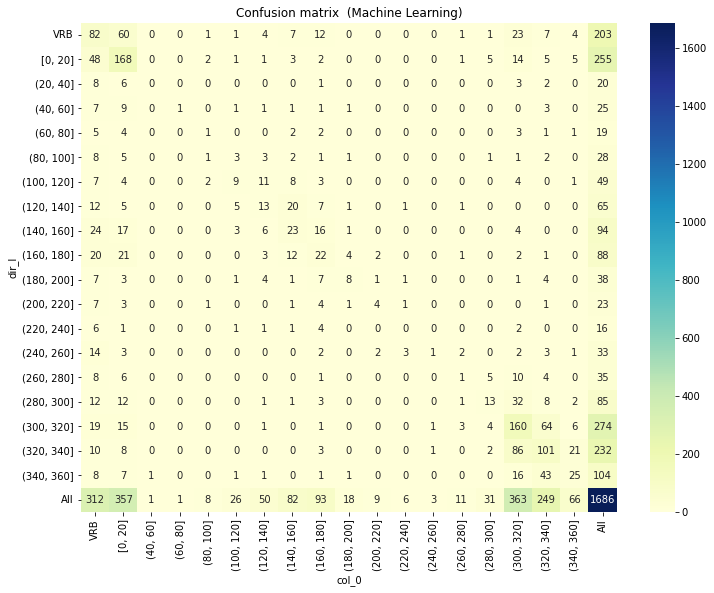

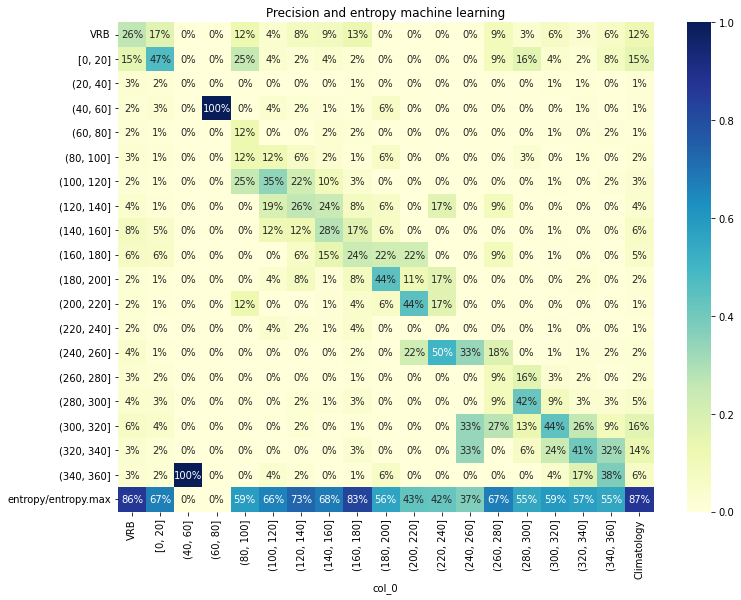

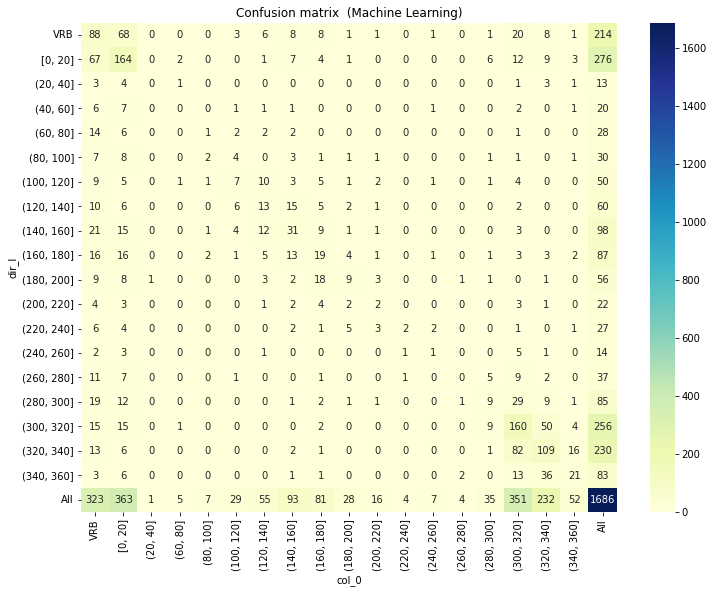

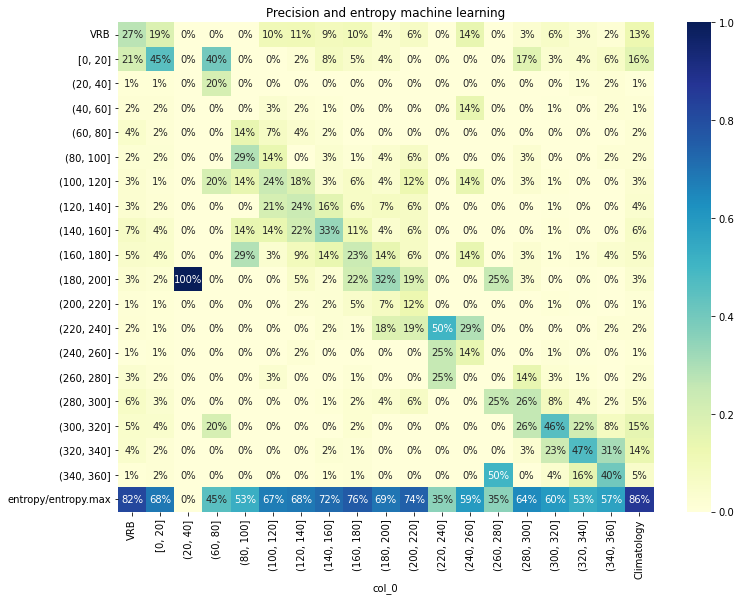

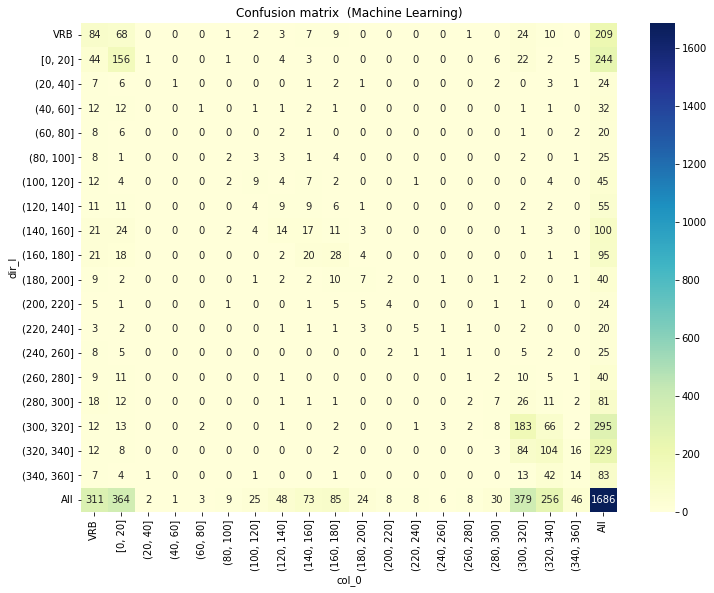

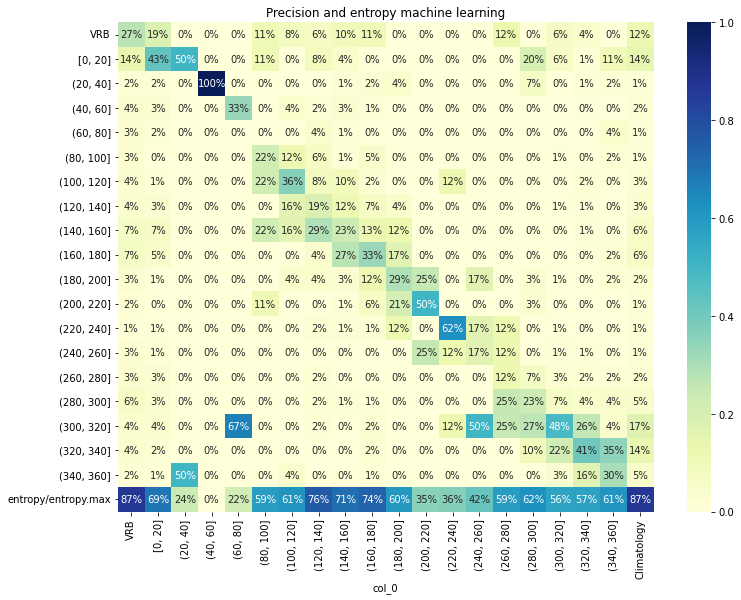

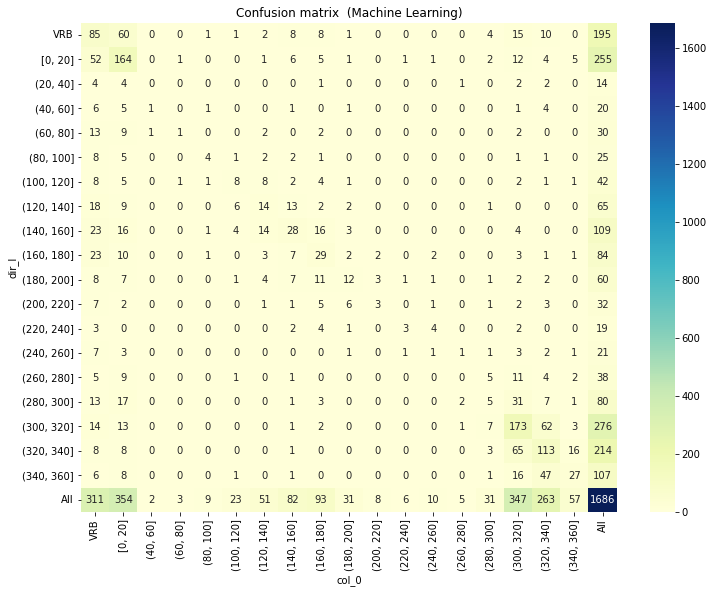

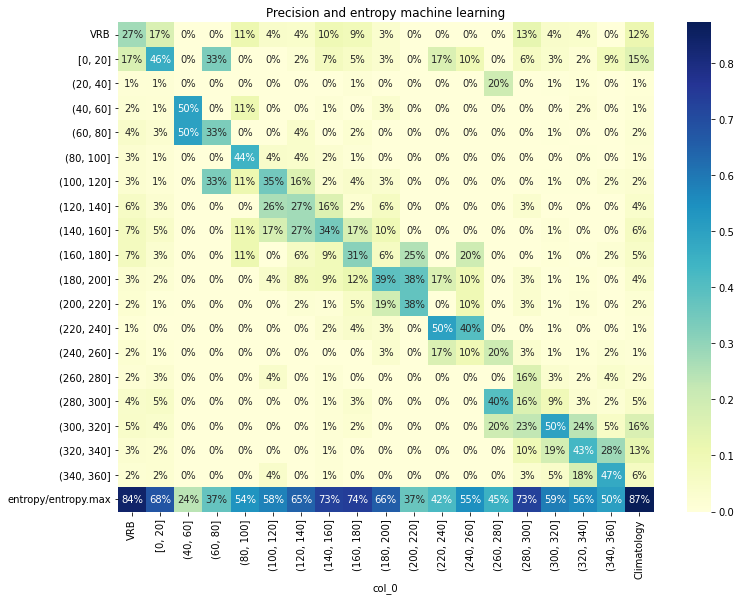

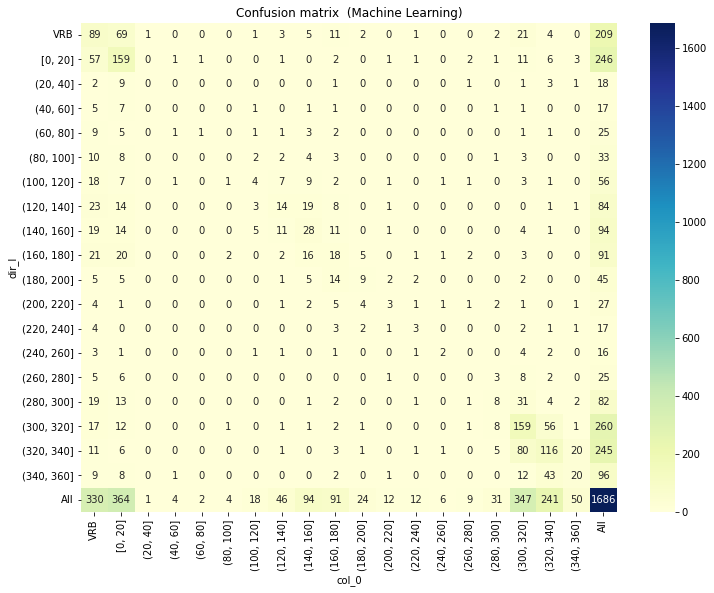

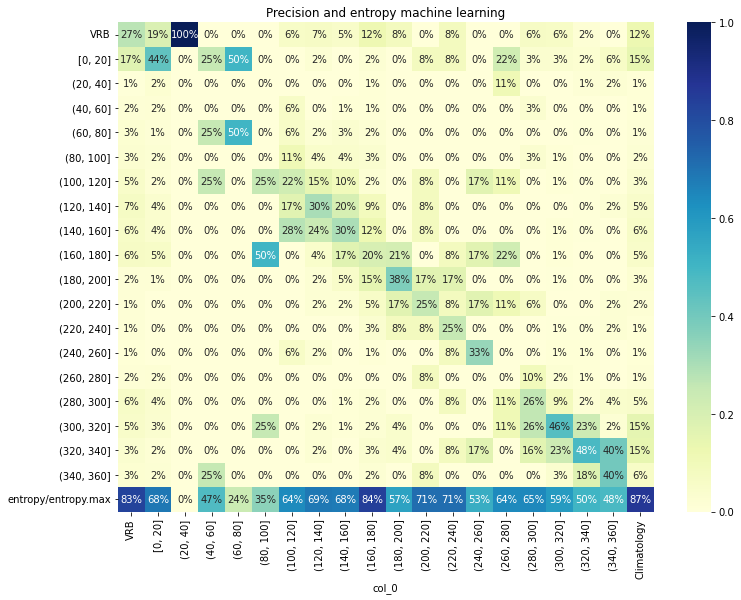

In [21]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  comuns = [element for element in labels+["All"] if element in cm.columns]
  sns.heatmap(cm[comuns],annot=True,cmap="YlGnBu",fmt='.0f');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\n accuracy mean of samples: ",acc_ml)



**T test (1sample) compare machine learning mean accuracy in a sample (n=5) versus meteorological model mean accuracy at point 0 (14%) and at point 1 (14%).
the alternative hypothesis is: the mean of the underlying distribution 
of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [22]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.14, alternative="greater")
sta1, p_value1 = stats.ttest_1samp(acc_ml, popmean=0.14, alternative="greater")

print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")

print("\n**** Point 1 ****")
print("\np value point 1:",p_value1 )
if p_value1 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")    


alpha:  0.01

accuracy list from machine learning test: [0.37, 0.38, 0.37, 0.4, 0.38]

**** Point 0 ****

p_value point 0: 8.109840889128055e-07

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0

**** Point 1 ****

p value point 1: 8.109840889128055e-07

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1


**Add time variables**

In [23]:
df_vrb["hour"] = df_vrb.index.hour
df_vrb["month"] = df_vrb.index.month
df_vrb["dayofyear"] = df_vrb.index.dayofyear
df_vrb["weekofyear"] = df_vrb.index.isocalendar().week.astype(int)

In [24]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0', 'racha_v0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0', 'lhsublac0',
       'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1', 'lwflx1',
       'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object')

<ipython-input-25-0d786e6c5121>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.384615  0.204082  0.266667    49.000000
(120, 140]     0.325581  0.215385  0.259259    65.000000
(140, 160]     0.289157  0.255319  0.271186    94.000000
(160, 180]     0.255814  0.250000  0.252874    88.000000
(180, 200]     0.260870  0.157895  0.196721    38.000000
(20, 40]       0.000000  0.000000  0.000000    20.000000
(200, 220]     0.307692  0.173913  0.222222    23.000000
(220, 240]     0.000000  0.000000  0.000000    16.000000
(240, 260]     0.000000  0.000000  0.000000    33.000000
(260, 280]     0.000000  0.000000  0.000000    35.000000
(280, 300]     0.354839  0.129412  0.189655    85.000000
(300, 320]     0.433333  0.569343  0.492114   274.000000
(320, 340]     0.400810  0.426724  0.413361   232.000000
(340, 360]     0.318182  0.201923  0.247059   104.000000
(40, 60]       0.000000  0.000000  0.000000    25.000000
(60, 80]       0.500000  0.052632  0.095238    19.000000
(80, 100]      0.166667  0.0357

<ipython-input-25-0d786e6c5121>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.275862  0.160000  0.202532    50.000000
(120, 140]     0.264151  0.233333  0.247788    60.000000
(140, 160]     0.373494  0.316327  0.342541    98.000000
(160, 180]     0.235955  0.241379  0.238636    87.000000
(180, 200]     0.500000  0.178571  0.263158    56.000000
(20, 40]       0.000000  0.000000  0.000000    13.000000
(200, 220]     0.200000  0.136364  0.162162    22.000000
(220, 240]     0.571429  0.148148  0.235294    27.000000
(240, 260]     0.200000  0.142857  0.166667    14.000000
(260, 280]     0.000000  0.000000  0.000000    37.000000
(280, 300]     0.230769  0.070588  0.108108    85.000000
(300, 320]     0.432203  0.597656  0.501639   256.000000
(320, 340]     0.460251  0.478261  0.469083   230.000000
(340, 360]     0.403846  0.253012  0.311111    83.000000
(40, 60]       0.000000  0.000000  0.000000    20.000000
(60, 80]       0.000000  0.000000  0.000000    28.000000
(80, 100]      0.222222  0.0666

<ipython-input-25-0d786e6c5121>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.296296  0.177778  0.222222    45.000000
(120, 140]     0.163265  0.145455  0.153846    55.000000
(140, 160]     0.268657  0.180000  0.215569   100.000000
(160, 180]     0.264368  0.242105  0.252747    95.000000
(180, 200]     0.307692  0.200000  0.242424    40.000000
(20, 40]       0.000000  0.000000  0.000000    24.000000
(200, 220]     0.500000  0.125000  0.200000    24.000000
(220, 240]     0.625000  0.250000  0.357143    20.000000
(240, 260]     0.285714  0.080000  0.125000    25.000000
(260, 280]     0.142857  0.025000  0.042553    40.000000
(280, 300]     0.333333  0.111111  0.166667    81.000000
(300, 320]     0.487738  0.606780  0.540785   295.000000
(320, 340]     0.413534  0.480349  0.444444   229.000000
(340, 360]     0.280000  0.168675  0.210526    83.000000
(40, 60]       0.000000  0.000000  0.000000    32.000000
(60, 80]       0.000000  0.000000  0.000000    20.0

<ipython-input-25-0d786e6c5121>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.409091  0.214286  0.281250    42.000000
(120, 140]     0.347826  0.246154  0.288288    65.000000
(140, 160]     0.347222  0.229358  0.276243   109.000000
(160, 180]     0.290698  0.297619  0.294118    84.000000
(180, 200]     0.351351  0.216667  0.268041    60.000000
(20, 40]       0.000000  0.000000  0.000000    14.000000
(200, 220]     0.363636  0.125000  0.186047    32.000000
(220, 240]     0.375000  0.157895  0.222222    19.000000
(240, 260]     0.100000  0.047619  0.064516    21.000000
(260, 280]     0.000000  0.000000  0.000000    38.000000
(280, 300]     0.241379  0.087500  0.128440    80.000000
(300, 320]     0.507418  0.619565  0.557912   276.000000
(320, 340]     0.432234  0.551402  0.484600   214.000000
(340, 360]     0.465517  0.252336  0.327273   107.000000
(40, 60]       0.500000  0.100000  0.166667    20.000000
(60, 80]       0.200000  0.033333  0.057143    30.000000
(80, 100]      0.444444  0.1600

<ipython-input-25-0d786e6c5121>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.263158  0.089286  0.133333    56.000000
(120, 140]     0.264151  0.166667  0.204380    84.000000
(140, 160]     0.294737  0.297872  0.296296    94.000000
(160, 180]     0.222222  0.219780  0.220994    91.000000
(180, 200]     0.333333  0.177778  0.231884    45.000000
(20, 40]       0.000000  0.000000  0.000000    18.000000
(200, 220]     0.230769  0.111111  0.150000    27.000000
(220, 240]     0.200000  0.117647  0.148148    17.000000
(240, 260]     0.250000  0.125000  0.166667    16.000000
(260, 280]     0.000000  0.000000  0.000000    25.000000
(280, 300]     0.242424  0.097561  0.139130    82.000000
(300, 320]     0.454023  0.607692  0.519737   260.000000
(320, 340]     0.466667  0.457143  0.461856   245.000000
(340, 360]     0.400000  0.208333  0.273973    96.000000
(40, 60]       0.000000  0.000000  0.000000    17.000000
(60, 80]       0.000000  0.000000  0.000000    25.000000
(80, 100]      0.166667  0.0303

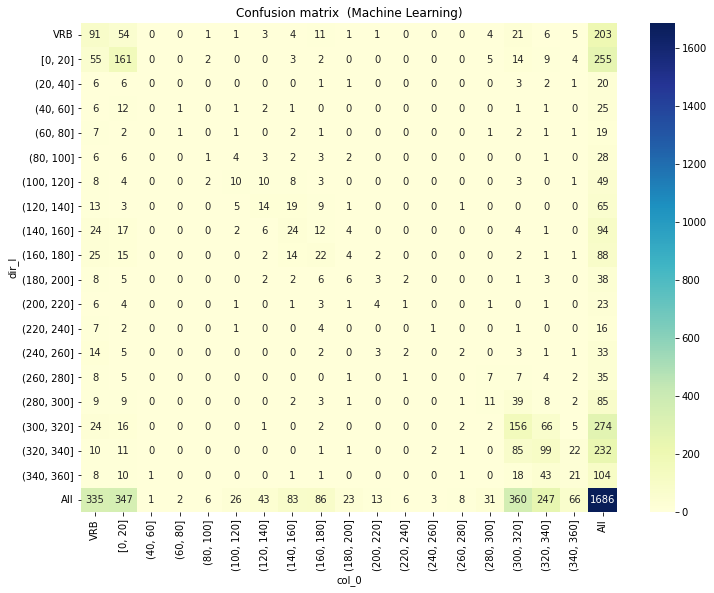

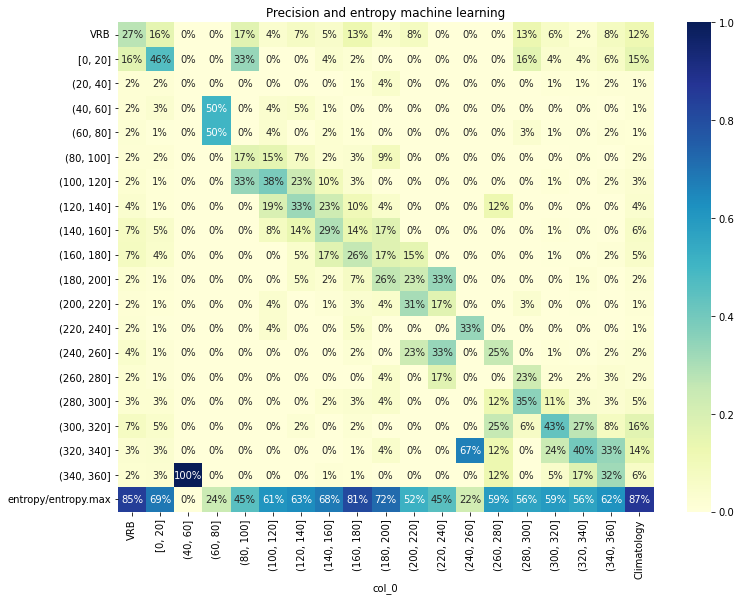

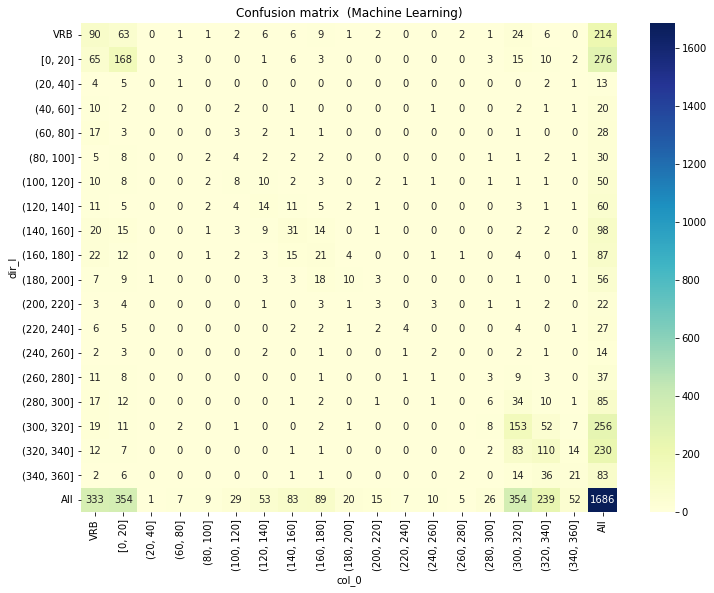

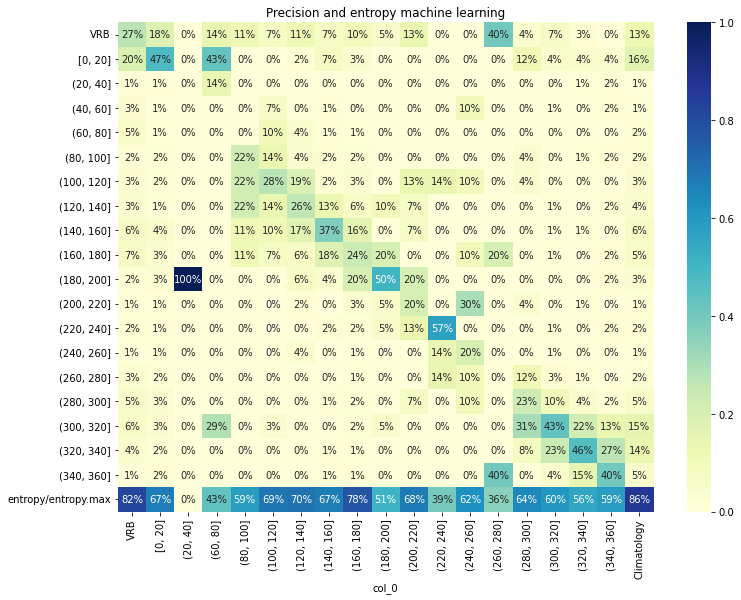

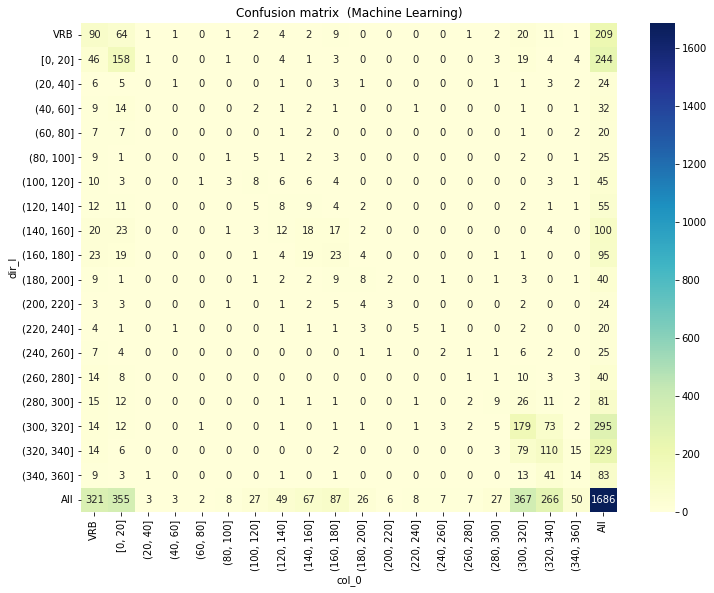

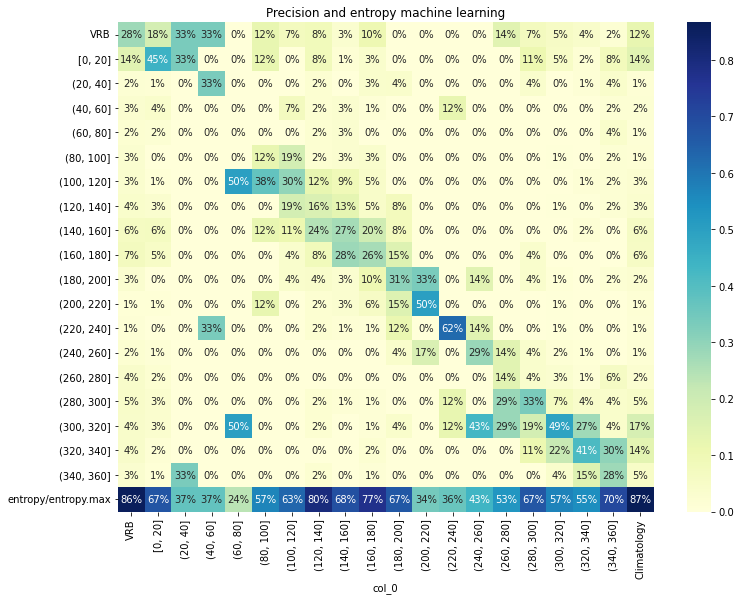

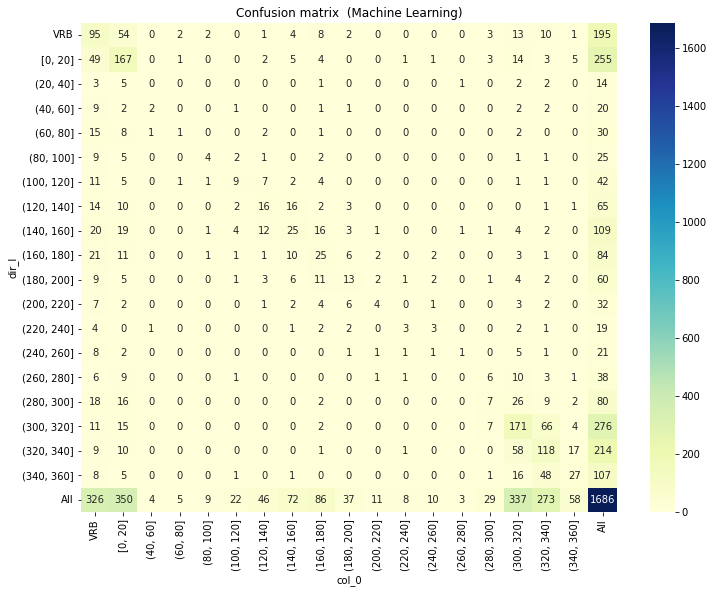

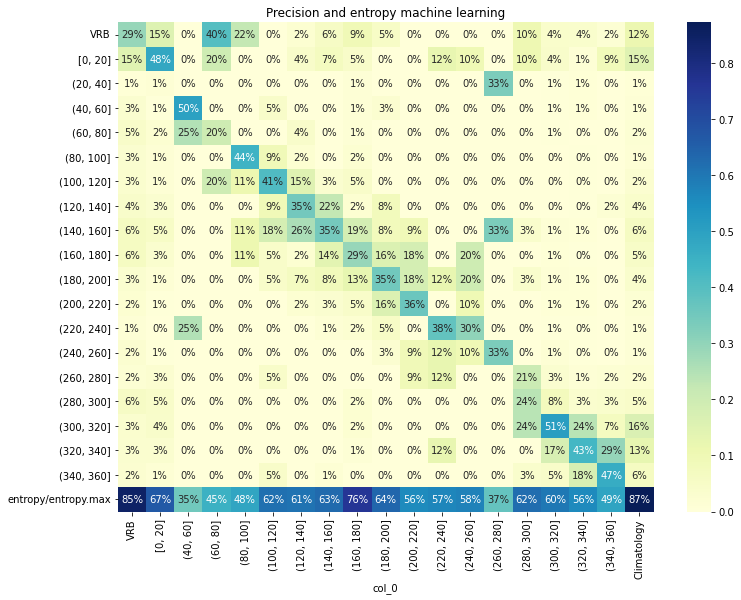

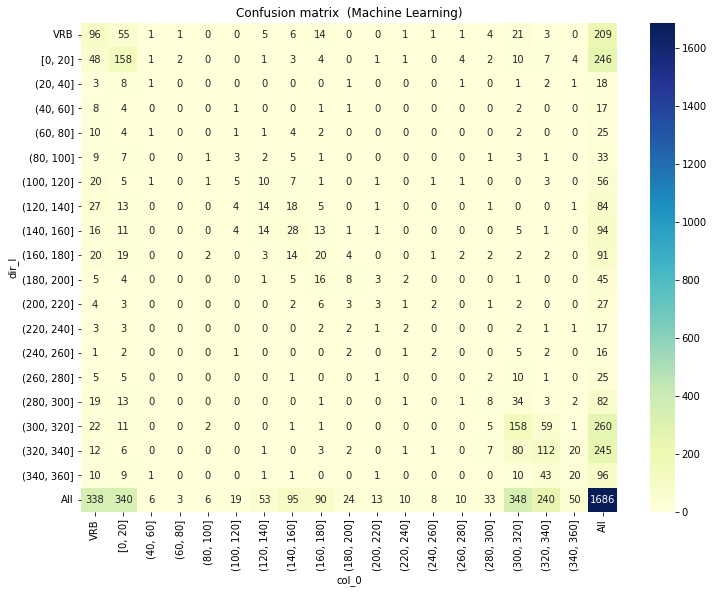

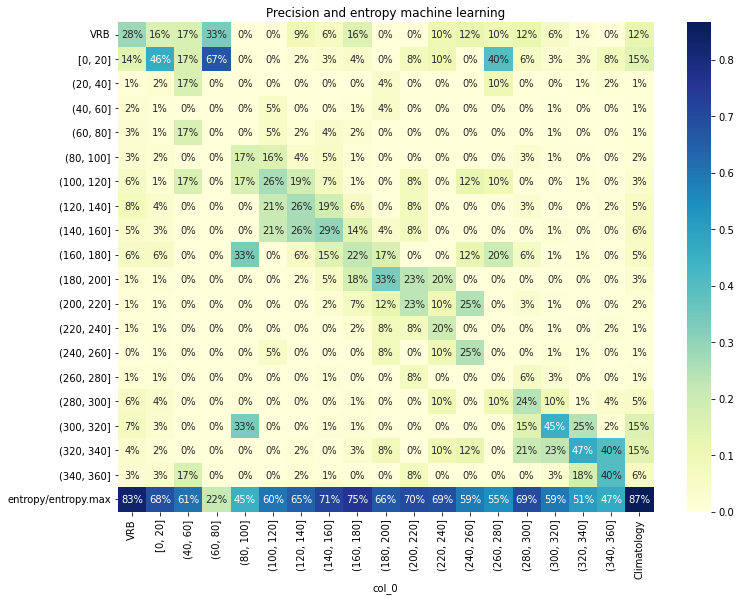

In [25]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

# mean accuracy machine learning sample after add time variables
acc_ml_a = []

# loop random
for t in range (0,5):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_a.append(round(accuracy_score(y_test, y_pred),2))

  
  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  comuns = [element for element in labels+["All"] if element in cm.columns]
  sns.heatmap(cm[comuns],annot=True,cmap="YlGnBu",fmt='.0f');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%');

 

  #quality report
  print("\n Quality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nAccuracy mean of samples trained with time variables: ",acc_ml_a)

In [26]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 3.2%
snow_prec0: 0.0%
isocero0: 2.0%
mod0: 3.5%
racha_u0: 3.3%
racha_v0: 3.1%
mslp0: 2.0%
temp0: 1.8%
rh0: 1.3%
visibility0: 2.5%
lhevapac0: 2.5%
lhsublac0: 3.0%
lwflx0: 2.3%
prec0: 0.7%
swflx0: 1.3%
shflxac0: 2.8%
cape0: 2.6%
cin0: 2.3%
cfh0: 0.7%
cfl0: 0.7%
cfm0: 0.7%
cft0: 0.7%
HGT5000: 1.8%
HGT8500: 1.9%
T5000: 2.2%
T8500: 1.8%
dir1: 3.3%
snow_prec1: 0.0%
isocero1: 1.6%
mod1: 3.6%
racha_u1: 3.3%
racha_v1: 3.1%
mslp1: 1.5%
temp1: 1.8%
rh1: 1.1%
visibility1: 2.1%
lhevapac1: 2.4%
lhsublac1: 1.8%
lwflx1: 2.4%
prec1: 0.6%
swflx1: 1.1%
shflxac1: 2.8%
cape1: 2.7%
cin1: 2.4%
cfh1: 0.7%
cfl1: 0.6%
cfm1: 0.6%
cft1: 0.7%
HGT5001: 0.8%
HGT8501: 1.0%
T5001: 1.5%
T8501: 1.6%
hour: 1.7%
month: 0.2%
dayofyear: 2.1%
weekofyear: 0.4%


**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_a, alternative="less")

print("\nmeans without time variables:", acc_ml)
print("\nmeans with time variables:", acc_ml_a)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the mean of the sample without time variables inputs is less than the mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables ")




means without time variables: [0.35, 0.36, 0.37, 0.37, 0.37]

means with time variables: [0.35, 0.36, 0.37, 0.37, 0.37]

alpha:  0.01

p_value point:  nan

we are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables 


In [ ]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("dir_LEPP_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
